In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf

# Load dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Reshape dataset to add channel dimension
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# Normalize pixel values to range [0,1]
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Define CNN model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
model.fit(train_X, train_Y_one_hot, epochs=10, batch_size=32, validation_data=(test_X, test_Y_one_hot))

# Evaluate model
loss, accuracy = model.evaluate(test_X, test_Y_one_hot)
print(f"Test Accuracy: {accuracy:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7652 - loss: 0.6410 - val_accuracy: 0.8615 - val_loss: 0.3689
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8860 - loss: 0.3126 - val_accuracy: 0.8761 - val_loss: 0.3419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9017 - loss: 0.2672 - val_accuracy: 0.8973 - val_loss: 0.2837
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9156 - loss: 0.2307 - val_accuracy: 0.9071 - val_loss: 0.2570
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9252 - loss: 0.2030 - val_accuracy: 0.9028 - val_loss: 0.2742
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9348 - loss: 0.1794 - val_accuracy: 0.8967 - val_loss: 0.2957
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9391 - loss: 0.1615 - val_accuracy: 0.9064 - val_loss: 0.2735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9447 -

Epoch 1/20


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4889 - loss: 0.3844 - val_accuracy: 0.5070 - val_loss: 0.2697
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5119 - loss: 0.2731 - val_accuracy: 0.5070 - val_loss: 0.2519
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5181 - loss: 0.2537 - val_accuracy: 0.5070 - val_loss: 0.2467
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5277 - loss: 0.2444 - val_accuracy: 0.5070 - val_loss: 0.2408
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5174 - loss: 0.2427 - val_accuracy: 0.5070 - val_loss: 0.2379
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5203 - loss: 0.2381 - val_accuracy: 0.5070 - val_loss: 0.2363
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5263 - loss: 0.2303 - val_accuracy: 0.5070 - val_loss: 0.2326
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5233 - loss: 0.2315 - val_accuracy: 0.507

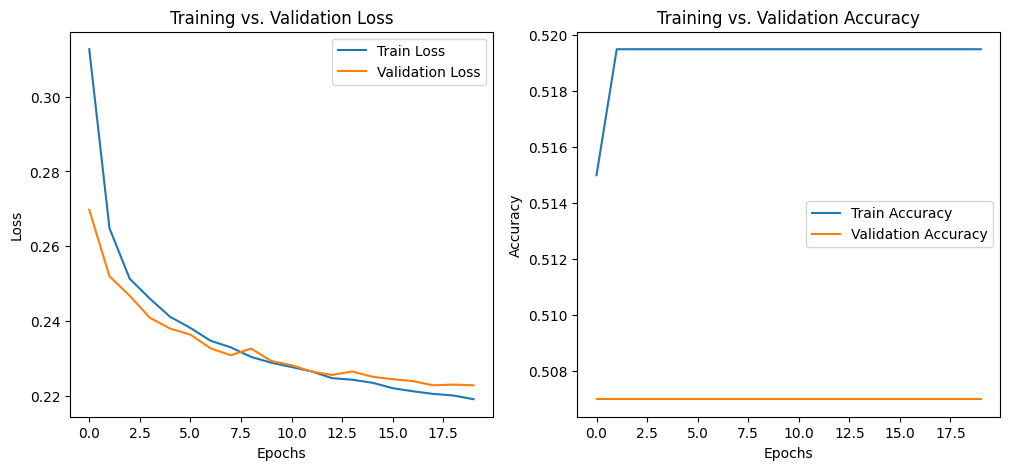

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load dataset
file_path_vectorized = "C:\\Users\\SWAGA\\Downloads\\vectorized_text_celeba_5000.csv"
df_vectorized = pd.read_csv(file_path_vectorized)

# Prepare features and labels
X = df_vectorized.drop(columns=["smiling"]).values  # Feature matrix (excluding 'smiling' column)
y = df_vectorized["smiling"].values  # Target labels

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for Conv1D input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define 1D CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(74, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])
Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(74, 1))
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(74, 1)),  # Define input explicitly
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Final Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.show()

In [3]:
# Evaluate the model on the test dataset
score = model.evaluate(X_test, y_test, verbose=1)

# Print accuracy
print(f'\nKeras CNN Test Accuracy: {score[1] * 100:.2f}%')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5014 - loss: 0.2246

Keras CNN Test Accuracy: 50.70%


Filter Shape: (3, 1, 32)


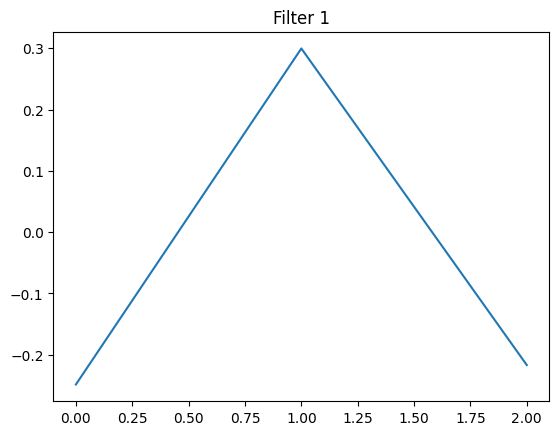

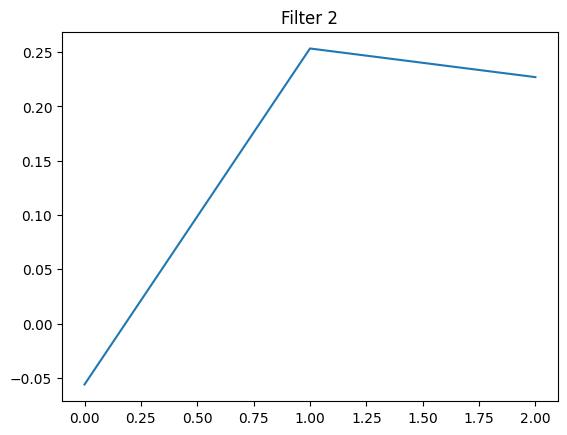

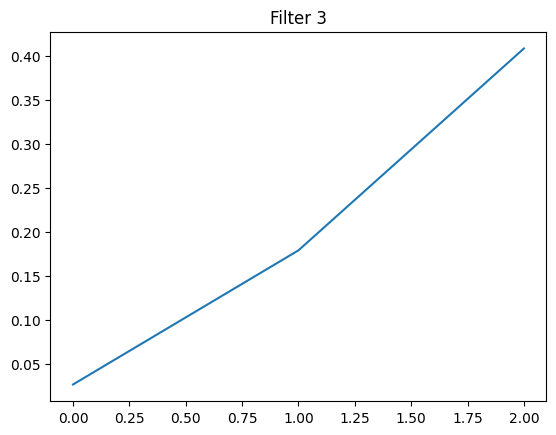

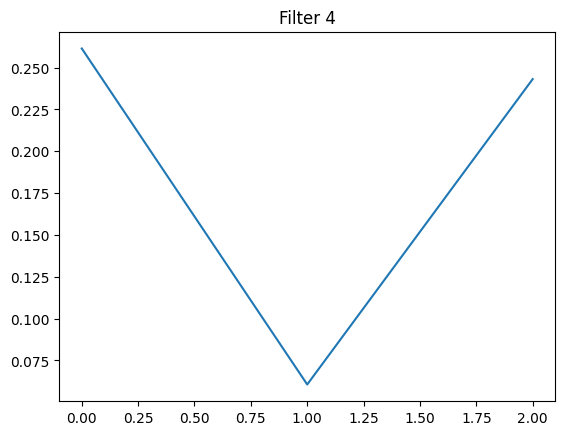

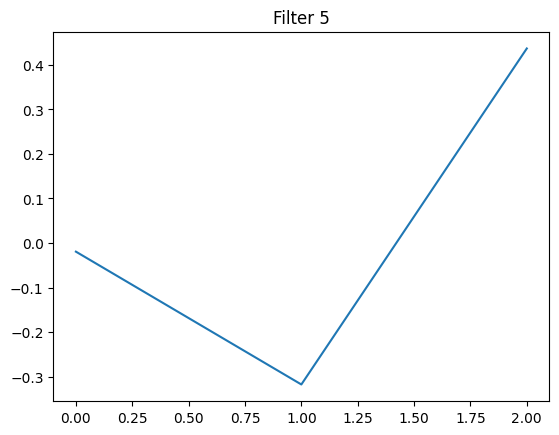

In [4]:
# Get weights of the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Display shape of filters
print(f"Filter Shape: {filters.shape}")

# Print the first few filters
import numpy as np
import matplotlib.pyplot as plt

num_filters = min(5, filters.shape[-1])  # Show up to 5 filters

for i in range(num_filters):
    plt.plot(filters[:, 0, i])  # Plot each filter as a line
    plt.title(f"Filter {i+1}")
    plt.show()


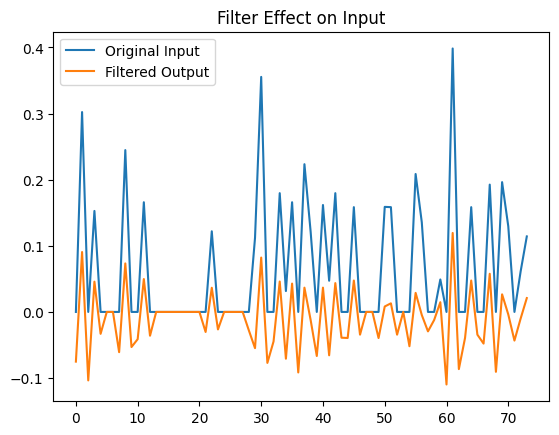

In [5]:
from scipy.signal import convolve

# Pick a sample input (first test sample)
sample_input = X_test[0].squeeze()  # Remove extra dimensions

# Pick a random filter (first filter)
sample_filter = filters[:, 0, 0]  # Extract first filter

# Perform 1D convolution
filtered_output = convolve(sample_input, sample_filter, mode='same')

# Plot original vs. filtered output
plt.plot(sample_input, label="Original Input")
plt.plot(filtered_output, label="Filtered Output")
plt.legend()
plt.title("Filter Effect on Input")
plt.show()


In [6]:
from tensorflow.keras.layers import Dense

# Define fully connected network (MLP)
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(74,)),  # Input layer
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
mlp_history = mlp_model.fit(X_train.squeeze(), y_train, epochs=20, batch_size=32, validation_data=(X_test.squeeze(), y_test))

# Evaluate model
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test.squeeze(), y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_test_acc * 100:.2f}%")


Epoch 1/20


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4935 - loss: 0.4103 - val_accuracy: 0.5070 - val_loss: 0.2549
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5236 - loss: 0.2455 - val_accuracy: 0.5070 - val_loss: 0.2454
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5278 - loss: 0.2363 - val_accuracy: 0.5070 - val_loss: 0.2401
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5088 - loss: 0.2374 - val_accuracy: 0.5070 - val_loss: 0.2355
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5070 - loss: 0.2327 - val_accuracy: 0.5070 - val_loss: 0.2308
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5319 - loss: 0.2170 - val_accuracy: 0.5070 - val_loss: 0.2269
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5198 - loss: 0.2188 - val_accuracy: 0.5070 - val_loss: 0.2240
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5082 - loss: 0.2224 - val_accuracy: 0.5070 - val_

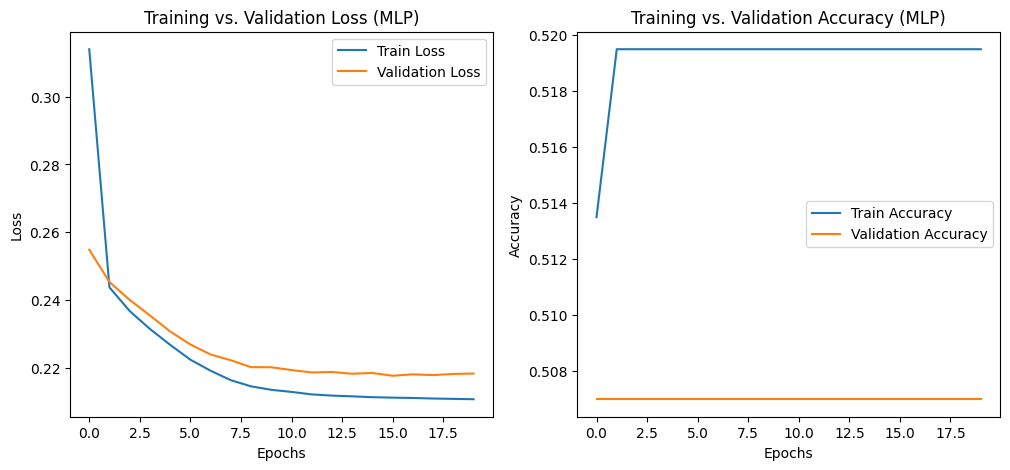

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss (MLP)')

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy (MLP)')

plt.show()


In [8]:
# Evaluate the model on test data
mlp_score = mlp_model.evaluate(X_test.squeeze(), y_test, verbose=1)
print(f"\nMLP Test Accuracy: {mlp_score[1] * 100:.2f}%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5014 - loss: 0.2200

MLP Test Accuracy: 50.70%
